<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="Rossum"></p>

In [30]:
import os
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D
from sklearn.model_selection import train_test_split
from keras import optimizers
from keras.preprocessing import image
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns

The Dogs vs. Cats dataset is a common computer vision dataset in which pictures are classified as either including a dog or a cat.

After the dataset is well studied, it can be used to understand and practice how to design, evaluate, and apply convolutional neural networks for image classification.

You will build a classifier with images and try to detect dogs versus cats using CNN.

Train set includes 12500 cat-5026 dog images, validation set includes 1219 cat-1071 dog images and test set incgludes 6897 cat and dogs images together. 

In [6]:
# read data and check how many class in train set

In [7]:
pwd

'C:\\Users\\mduru\\Desktop\\GITHUB\\Deep_Learning_Projects\\CNN_Project'

You can find data in this link  
https://drive.google.com/file/d/1zJvUtxigUFb52-8EcRS-TvhnmWUVLEdj/view?usp=sharing

In [10]:
my_data_dir = 'c:\\Users\\mduru\\Desktop\\GITHUB\\deep learning datalar\\cnn_project_data\\data'

In [11]:
# CONFIRM THAT THIS REPORTS BACK 'test', and 'train'
os.listdir(my_data_dir) 

['test', 'train', 'validation']

In [12]:
test_path = my_data_dir+'/test'
train_path = my_data_dir+"/train"
validation_path = my_data_dir+"/validation"

In [13]:
os.listdir(train_path)

['cat', 'dog']

**Let's check how many images there are.**

In [14]:
#number of cat images in train set
len(os.listdir(train_path+'/cat'))

12500

In [15]:
#number of dog images in train set
len(os.listdir(train_path+'/dog'))

5026

In [16]:
#take cat image at index 0 from train set
#take dog image at index 1 from train set
#compare their shapes
cat_zero = os.listdir(train_path+'/cat')[0]
dog_one = os.listdir(train_path+'/dog')[1]

In [17]:
dog = imread(train_path+'/dog/'+ dog_one)
dog 

array([[[ 78,  41,  22],
        [ 78,  41,  22],
        [ 78,  41,  22],
        ...,
        [121,  93,  69],
        [122,  94,  70],
        [122,  94,  70]],

       [[ 79,  42,  23],
        [ 80,  43,  24],
        [ 80,  43,  24],
        ...,
        [122,  94,  70],
        [122,  94,  70],
        [123,  95,  71]],

       [[ 80,  43,  24],
        [ 81,  44,  25],
        [ 84,  47,  28],
        ...,
        [122,  94,  70],
        [123,  95,  71],
        [124,  96,  72]],

       ...,

       [[124, 134, 143],
        [128, 138, 147],
        [133, 143, 152],
        ...,
        [ 26,  29,  36],
        [ 27,  30,  37],
        [ 28,  31,  38]],

       [[124, 134, 143],
        [128, 138, 147],
        [133, 143, 152],
        ...,
        [ 22,  25,  32],
        [ 23,  26,  33],
        [ 24,  27,  34]],

       [[124, 134, 143],
        [128, 138, 147],
        [133, 143, 152],
        ...,
        [ 21,  24,  31],
        [ 22,  25,  32],
        [ 24,  27,  34]]

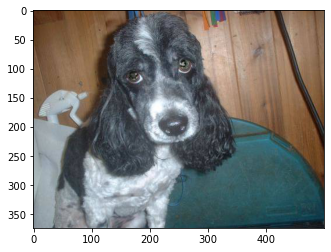

In [18]:
#show dog image
plt.imshow(dog)

In [19]:
cat = imread(train_path+'/cat/'+ cat_zero)
cat

array([[[203, 164,  87],
        [203, 164,  87],
        [204, 165,  88],
        ...,
        [240, 201, 122],
        [239, 200, 121],
        [238, 199, 120]],

       [[203, 164,  87],
        [203, 164,  87],
        [204, 165,  88],
        ...,
        [241, 202, 123],
        [240, 201, 122],
        [238, 199, 120]],

       [[203, 164,  87],
        [203, 164,  87],
        [204, 165,  88],
        ...,
        [241, 202, 123],
        [240, 201, 122],
        [239, 200, 121]],

       ...,

       [[153, 122,  55],
        [153, 122,  55],
        [153, 122,  55],
        ...,
        [  2,   2,   0],
        [  2,   2,   0],
        [  2,   2,   0]],

       [[152, 121,  54],
        [152, 121,  54],
        [152, 121,  54],
        ...,
        [  2,   2,   0],
        [  2,   2,   0],
        [  2,   2,   0]],

       [[151, 120,  53],
        [151, 120,  53],
        [151, 120,  53],
        ...,
        [  1,   1,   0],
        [  1,   1,   0],
        [  1,   1,   0]]

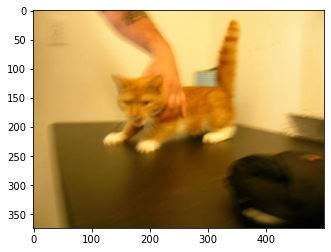

In [20]:
#show cat image
plt.imshow(cat)

**Let's decide on the final dimension of these images.**

In [21]:
dog.shape

(374, 500, 3)

In [22]:
cat.shape

(374, 500, 3)

In [23]:
x= []
y = []
for image in os.listdir(train_path+'\\cat'):
    
    img = imread(train_path+'\\cat'+'\\'+image)
    d1,d2,colors = img.shape
    x.append(d1)
    y.append(d2)

C:\Users\mduru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


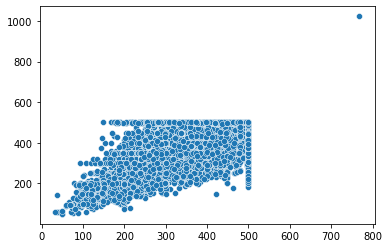

In [24]:
sns.scatterplot(x,y);

In [25]:
np.mean(x) #mean of cat_x

356.46712

In [26]:
np.median(x)

374.0

In [75]:
np.mean(y) #mean of cat_y

410.52264

In [27]:
np.median(y)

470.0

In [64]:
x= []
y = []
for image in os.listdir(train_path+'\\dog'):
    
    img = imread(train_path+'\\dog'+'\\'+image)
    d1,d2,colors = img.shape
    x.append(d1)
    y.append(d2)

C:\Users\mduru\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


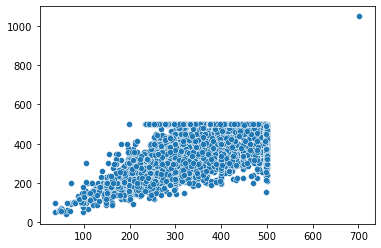

In [65]:
sns.scatterplot(x,y);

In [70]:
np.mean(x) #mean of dog_x

365.0505372065261

In [71]:
np.mean(y) #mean of dog_y

398.9930362116992

In [76]:
# decide on a shape to use it in your model as input shape. you can either use average shape size or try something different. 128*128 is preferred here
image_shape = (128,128,3)

In [78]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Args:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0.
 |      featurewise_s

**Image Manipulation**

We can use the ImageDataGenerator to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. ImageDataGenerator does the followings.

* Accepts a batch of images used for training.
* Applies a series of random transformations to each image in the batch.
* Replaces the original batch with randomly transformed batch.
* Training the CNN on this randomly transformed batch.

The goal of applying data augmentation is to have a more generalized model.

In [68]:
#use ImageDataGenerator to manipulate the images

In [79]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [80]:
image_gen = ImageDataGenerator(rotation_range=20, # randomly rotate images in the range (degrees, 0 to 180)
                               width_shift_range=0.10, # randomly shift images horizontally (fraction of total width)
                               height_shift_range=0.10, # randomly shift images vertically (fraction of total height)
                               rescale=1/255, # divide all values by 255.
                               shear_range=0.1, # apply shearing in the range (radians, -pi/2 to pi/2)
                               zoom_range=0.1, # apply scaling in the range (1-zoom_range to 1+zoom_range)
                               horizontal_flip=True, # Allow horizontal flipping
                               fill_mode='nearest' # Fill any empty pixels with the nearest pixel
                              )

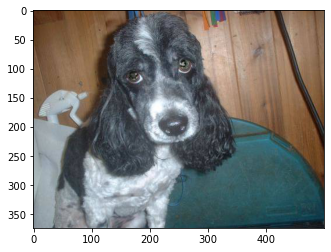

In [85]:
plt.imshow(dog)

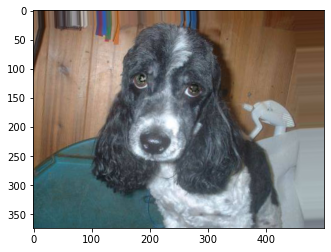

In [90]:
#show transfromed version of dog image
plt.imshow(image_gen.random_transform(dog)) # random_transform() is a method of ImageDataGenerator class

### Generating many manipulated images from a directory


flow_from_directory function works with images organized in sub-directories. Your directories should include only one class of images, so one folder per class of images.

main_directory/

...class_a/

......a_image_1.jpg

......a_image_2.jpg

...class_b/

......b_image_1.jpg

......b_image_2.jpg

[bağlantı metni](https://drive.google.com/file/d/1ntiw1WnsWq5en96zRQmWADFxoCKS4DNc/view?usp=sharing)

image_gen.flow_from_directory(train_path)

In [100]:
image_gen.flow_from_directory(validation_path) #validation_path is a directory

Found 2290 images belonging to 2 classes.


In [101]:
image_gen.flow_from_directory(train_path) #train_path is a directory

Found 17526 images belonging to 2 classes.


In [102]:
image_gen.flow_from_directory(test_path) # test_path is not a directory

Found 0 images belonging to 0 classes.


# Creating the Model

In [135]:
#create your CNN model here
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [136]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',)) # image_shape = (128,128,3) 
model.add(MaxPooling2D(pool_size=(2, 2))) 

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))


model.add(Dropout(0.5))


model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [137]:
model.summary() #check the summary of your model

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 64)      

## Early Stopping

In [138]:
from tensorflow.keras.callbacks import EarlyStopping

In [139]:
early_stop =  EarlyStopping(monitor='val_loss', patience=3) # patience = 3 is the number of epochs to wait before early stopping

In [140]:
batch_size = 16 # batch size is the number of images to feed the model at a time    

In [141]:
#use image_gen from above and read images from train and test set

In [142]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                                target_size=image_shape[:2],
                                                color_mode='rgb',
                                                batch_size=batch_size,
                                                class_mode='binary')

Found 17526 images belonging to 2 classes.


In [143]:
val_image_gen = image_gen.flow_from_directory(validation_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False) # shuffle = False is important for test and validation set

Found 2290 images belonging to 2 classes.


In [144]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',shuffle=False) # shuffle = False is important for test and validation set

Found 0 images belonging to 0 classes.


In [145]:
#show class indices in train set
train_image_gen.class_indices

{'cat': 0, 'dog': 1}

## Model Training

In [146]:
import warnings                             # ignore warnings
warnings.filterwarnings('ignore')

In [148]:
results = model.fit_generator(train_image_gen,epochs=15 ,                               #fit your model using train and validation set
                              validation_data=val_image_gen, callbacks=[early_stop])                       

Epoch 1/15
1096/1096 [==============================] - 218s 199ms/step - loss: 0.5436 - accuracy: 0.7314 - val_loss: 0.6363 - val_accuracy: 0.6441
Epoch 2/15
1096/1096 [==============================] - 207s 188ms/step - loss: 0.5039 - accuracy: 0.7589 - val_loss: 0.5628 - val_accuracy: 0.7153
Epoch 3/15
1096/1096 [==============================] - 208s 190ms/step - loss: 0.4683 - accuracy: 0.7836 - val_loss: 0.6286 - val_accuracy: 0.6790
Epoch 4/15
1096/1096 [==============================] - 208s 189ms/step - loss: 0.4341 - accuracy: 0.8022 - val_loss: 0.5606 - val_accuracy: 0.7293
Epoch 5/15
1096/1096 [==============================] - 207s 189ms/step - loss: 0.4118 - accuracy: 0.8161 - val_loss: 0.5921 - val_accuracy: 0.7166
Epoch 6/15
1096/1096 [==============================] - 209s 191ms/step - loss: 0.3986 - accuracy: 0.8243 - val_loss: 0.5906 - val_accuracy: 0.7004
Epoch 7/15
1096/1096 [==============================] - 208s 190ms/step - loss: 0.3878 - accuracy: 0.8276 - val_

# Evaluating the Model

In [149]:
losses = pd.DataFrame(model.history.history)   # create a dataframe of your model history
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.543590,0.731371,0.636278,0.644105
1,0.503851,0.758873,0.562802,0.715284
2,0.468323,0.783636,0.628646,0.679039
3,0.434096,0.802180,0.560646,0.729258
4,0.411802,0.816102,0.592127,0.716594


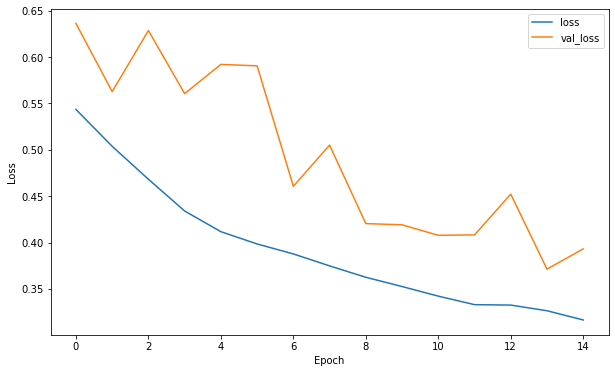

In [151]:
plt.figure(figsize=(10,6))                       # plot the loss of your model
plt.plot(losses.loss, label="loss")
plt.plot(losses.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

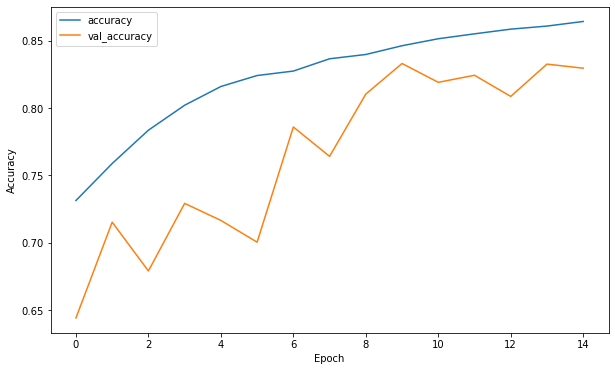

In [153]:
plt.figure(figsize=(10,6))                       # plot the accuracy of your model
plt.plot(losses.accuracy, label="accuracy")
plt.plot(losses.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [154]:
model.metrics_names

['loss', 'accuracy']

In [155]:
model.evaluate_generator(val_image_gen)

[0.3789825737476349, 0.8318777084350586]

In [156]:
pred_probabilities = model.predict_generator(val_image_gen)

In [157]:
pred_probabilities

array([[0.06467858],
       [0.28793126],
       [0.05891079],
       ...,
       [0.820004  ],
       [0.9980633 ],
       [0.99299425]], dtype=float32)

In [158]:
val_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1])

In [159]:
predictions = pred_probabilities > 0.5

In [160]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [161]:
from sklearn.metrics import classification_report,confusion_matrix

In [162]:
print(classification_report(val_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.79      0.91      0.84      1219
           1       0.87      0.72      0.79      1071

    accuracy                           0.82      2290
   macro avg       0.83      0.82      0.82      2290
weighted avg       0.83      0.82      0.82      2290



In [163]:
confusion_matrix(val_image_gen.classes,predictions)

array([[1106,  113],
       [ 296,  775]], dtype=int64)

In [32]:
from tensorflow.keras.models import load_model
#model.save('cat_dog_detector.h5')

# Predicting on an Image

In [33]:
from PIL import Image
from tensorflow.keras.preprocessing import image

In [34]:
model=load_model('cat_dog_detector.h5') # load your model

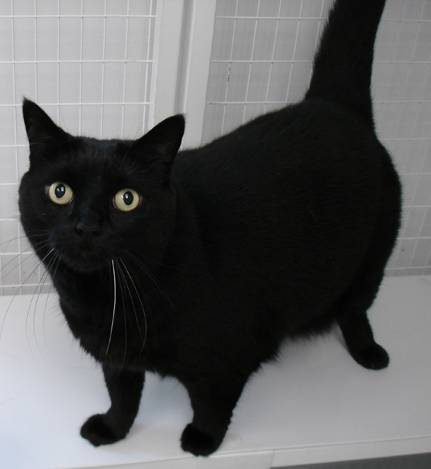

In [191]:
#read 2749.jpg from test set
my_image = image.load_img(test_path+"/2749.jpg") 
my_image   

In [192]:
#read 2749.jpg from test set
my_image = image.load_img(test_path+"/2749.jpg", target_size=image_shape)    # resize the image to 128x128
# res_my_image = my_image.resize(image_shape)

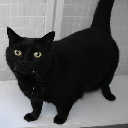

In [193]:
my_image

In [194]:
# turn the image into numpy array
my_image = image.img_to_array(my_image) # convert the image into numpy array
my_image.shape

(128, 128, 3)

In [195]:
#reshape it as below
res_my_image = np.expand_dims(my_image, axis=0) # add an extra dimension to the image
res_my_image.shape

(1, 128, 128, 3)

In [196]:
#predict the image class with your model
prediction = model.predict(res_my_image)
prediction

array([[0.]], dtype=float32)

In [197]:
train_image_gen.class_indices

{'cat': 0, 'dog': 1}

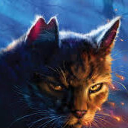

In [198]:
orioncat = image.load_img(test_path+"/orioncat.jpg", target_size=image_shape) 
orioncat

In [199]:
orioncat = image.img_to_array(my_image) # convert the image into numpy array
orioncat.shape

(128, 128, 3)

In [200]:
res_orioncat = np.expand_dims(my_image, axis=0) # add an extra dimension to the image
res_orioncat.shape

(1, 128, 128, 3)

In [201]:
model.predict(res_orioncat)

array([[0.]], dtype=float32)

In [202]:
train_image_gen.class_indices

{'cat': 0, 'dog': 1}

In [36]:
image_shape =(128,128,3)

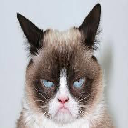

In [37]:
madcat = image.load_img(test_path+"/madcat.jpg", target_size=128,128,3))
madcat

In [39]:
res_madcat = np.expand_dims(madcat, axis=0) # add an extra dimension to the image
res_madcat.shape

(1, 128, 128, 3)

In [40]:
model.predict(res_madcat)

array([[0.9999999]], dtype=float32)